<a href="https://colab.research.google.com/github/lemmynation/DataScienceEcosystem/blob/main/Diabetes_Prediction_Papers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

**Mounting to drive**

```
# This is formatted as code
```



In [ ]:
from google.colab import  drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Dataset/Pima Indian Dataset/RAW/diabetes.csv'
df = pd.read_csv(path)

**Data Info**

In [ ]:
df.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0 33.60   
1              1       85             66             29        0 26.60   
2              8      183             64              0        0 23.30   
3              1       89             66             23       94 28.10   
4              0      137             40             35      168 43.10   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180 32.90   
764            2      122             70             27        0 36.80   
765            5      121             72             23      112 26.20   
766            1      126             60              0        0 30.10   
767            1       93             70             31        0 30.40   

     DiabetesPedigreeFunction  Age  Outcome  
0                        0.63   50 

**Data Info:**

In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.00,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.00,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.00,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.00,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.00,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.00,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.00,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.00,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
df.isnull().all()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


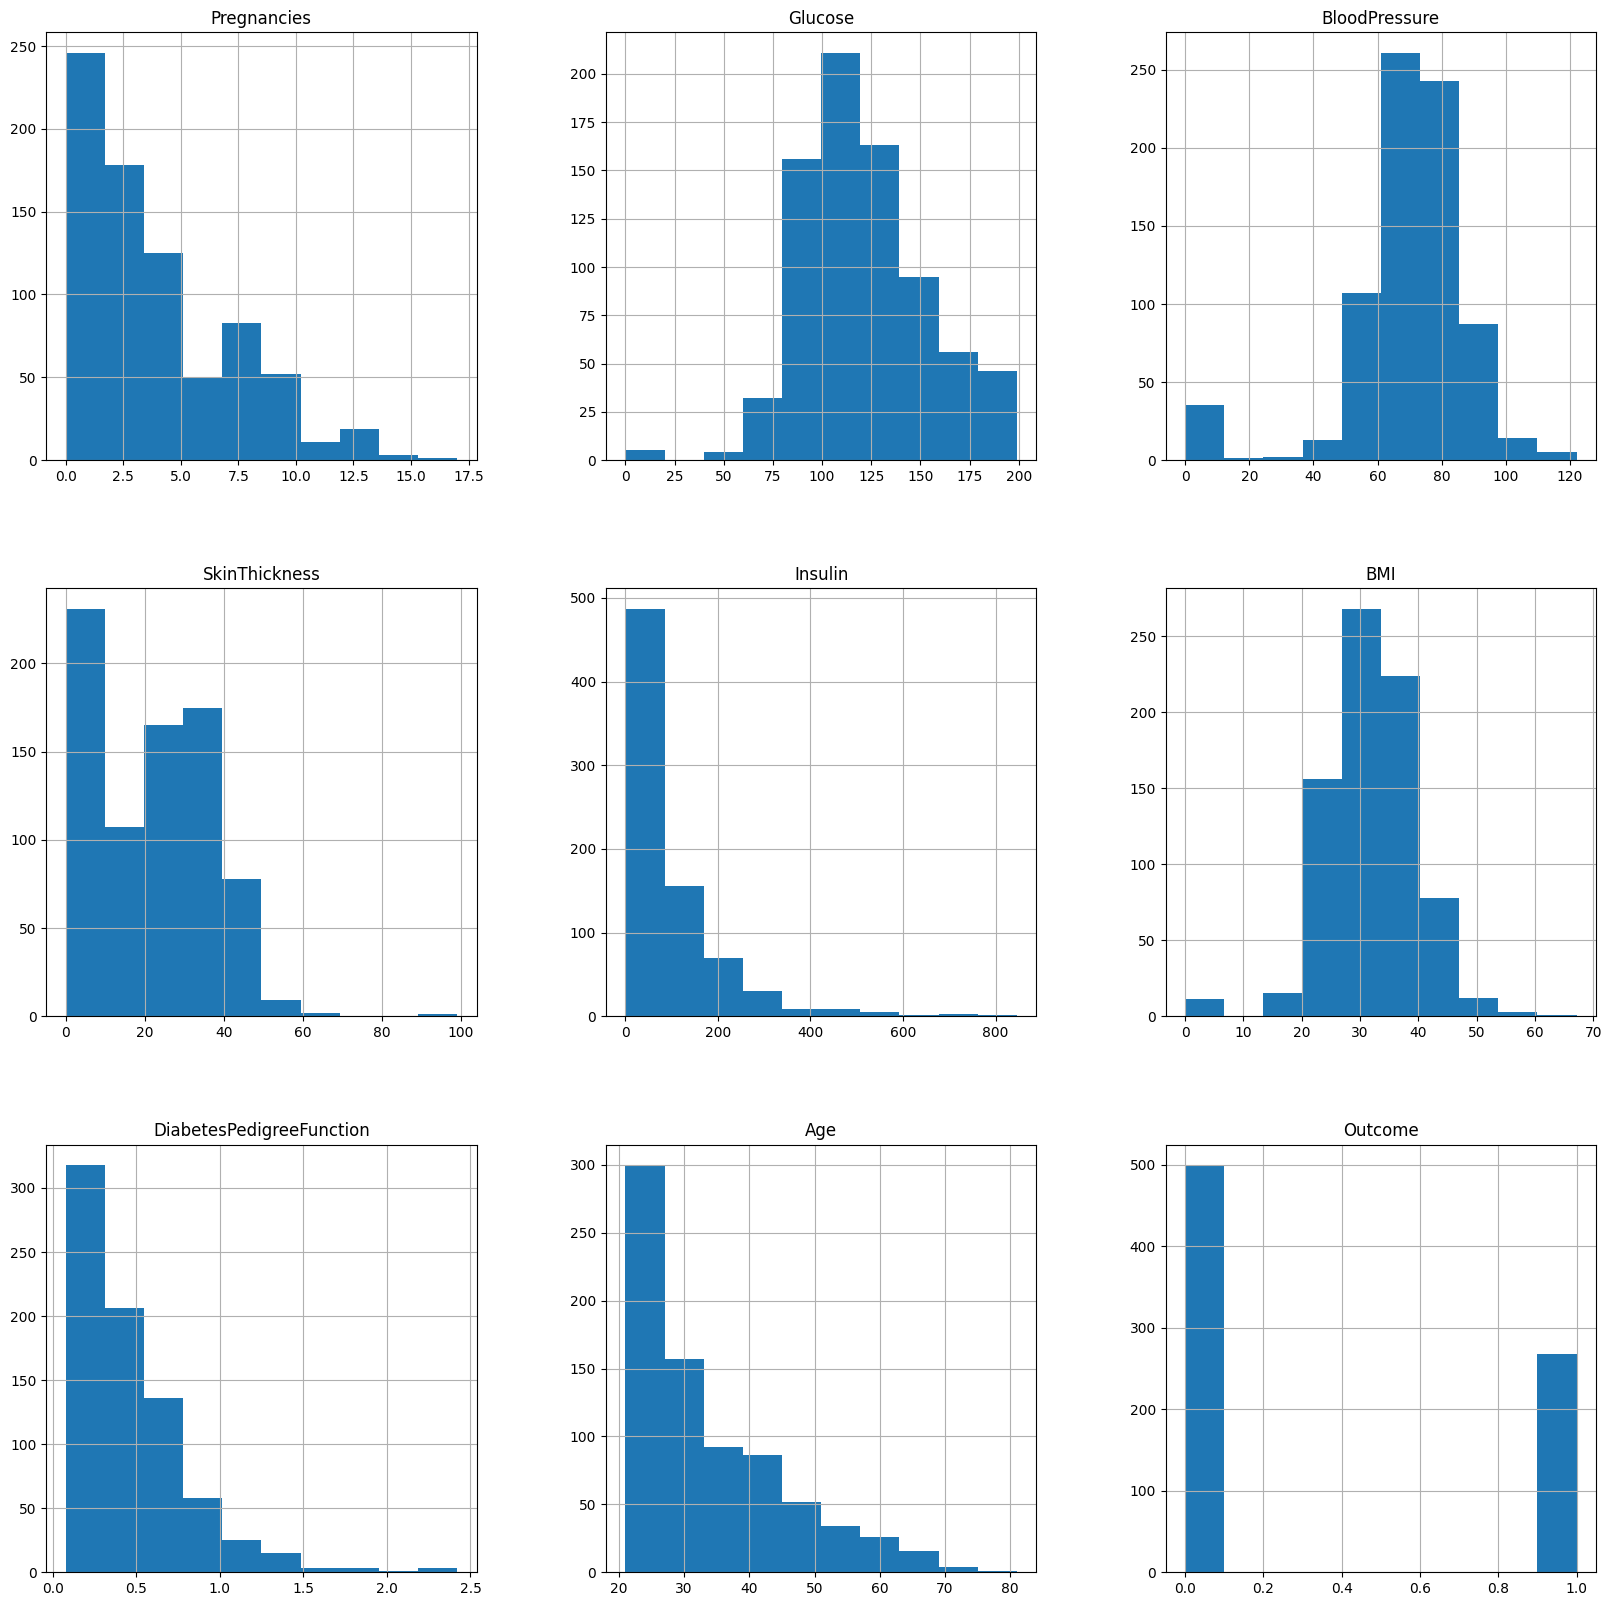

In [ ]:
p = df.hist(figsize = (20,20))

**Data Cleaning**

Replacing 0  with Nan

In [ ]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Replacing Nan values with mean:
Glucose,
Blood Pressure

Replacing Nan values with median:
Skin Thickness,
Insulin,
BMI


In [ ]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

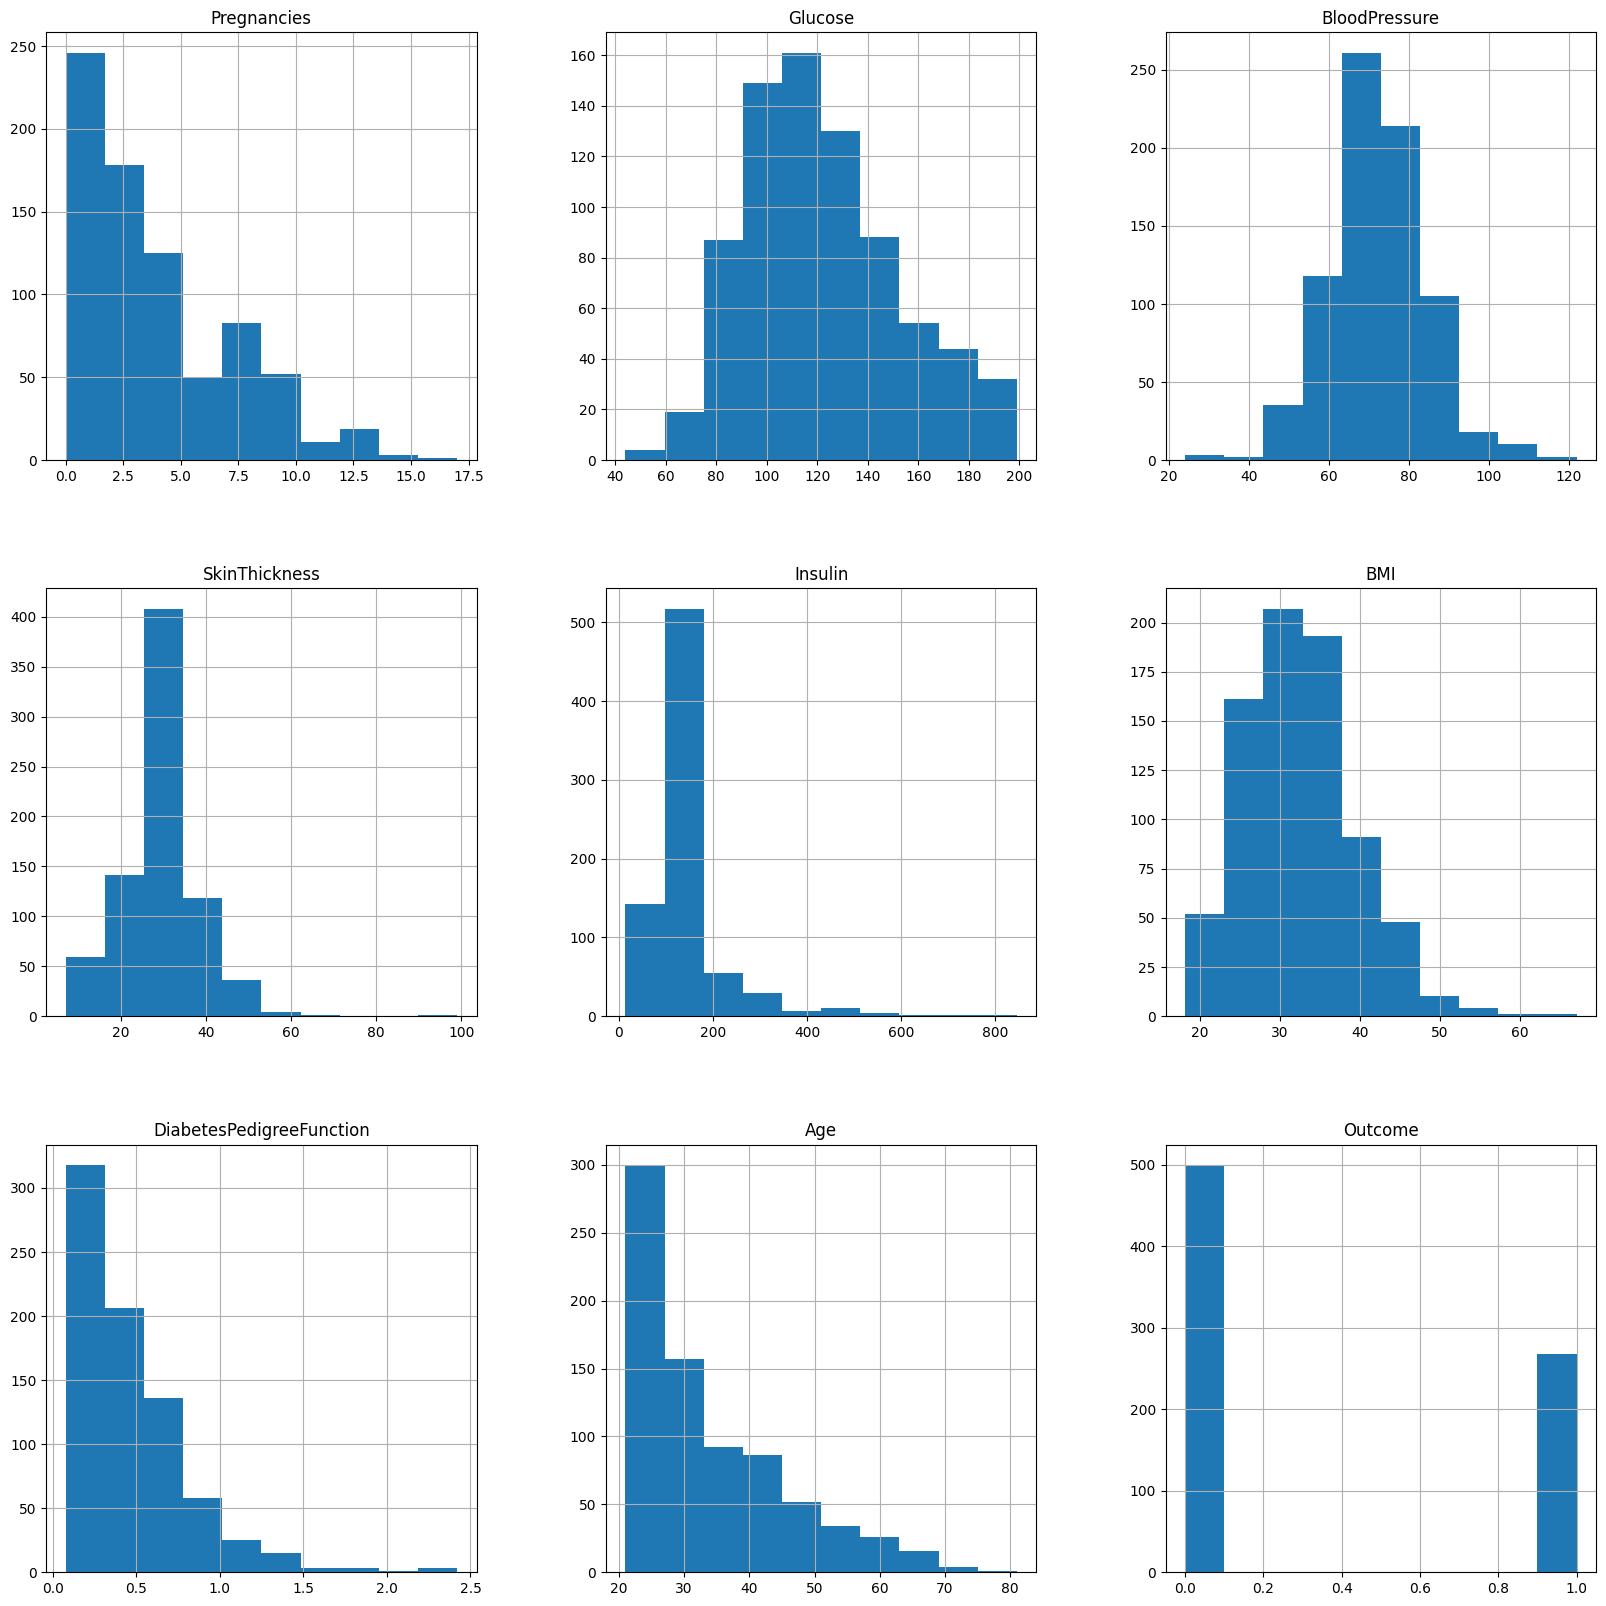

In [ ]:
p = df_copy.hist(figsize = (20,20))

In [ ]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.00,72.00,35.00,125.00,33.60,0.63,50,1
1,1,85.00,66.00,29.00,125.00,26.60,0.35,31,0
2,8,183.00,64.00,29.00,125.00,23.30,0.67,32,1
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1


In [ ]:
df_backup = df_copy

In [ ]:
def Winsorization_outliers(colname, df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    out = []
    for i in df:
        if (i > q3 or i < q1) and i>0:
            out.append(i)
    if(len(out) != 0):
      print(colname,'outliers:', len(out))
    return out

def remove_outliers(df):
    for col in df.columns:
        if df[col].dtype != 'object':
            data_filter = Winsorization_outliers(col, df[col])
            df = df[~df[col].isin(data_filter)]
    return df

df_new_backup = remove_outliers(df_backup)

Pregnancies outliers: 4
Glucose outliers: 14
BloodPressure outliers: 12
SkinThickness outliers: 12
Insulin outliers: 15
BMI outliers: 14
DiabetesPedigreeFunction outliers: 14
Age outliers: 6


In [ ]:
df_new_backup.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.00,72.00,35.00,125.00,33.60,0.63,50,1
1,1,85.00,66.00,29.00,125.00,26.60,0.35,31,0
2,8,183.00,64.00,29.00,125.00,23.30,0.67,32,1
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0
5,5,116.00,74.00,29.00,125.00,25.60,0.20,30,0


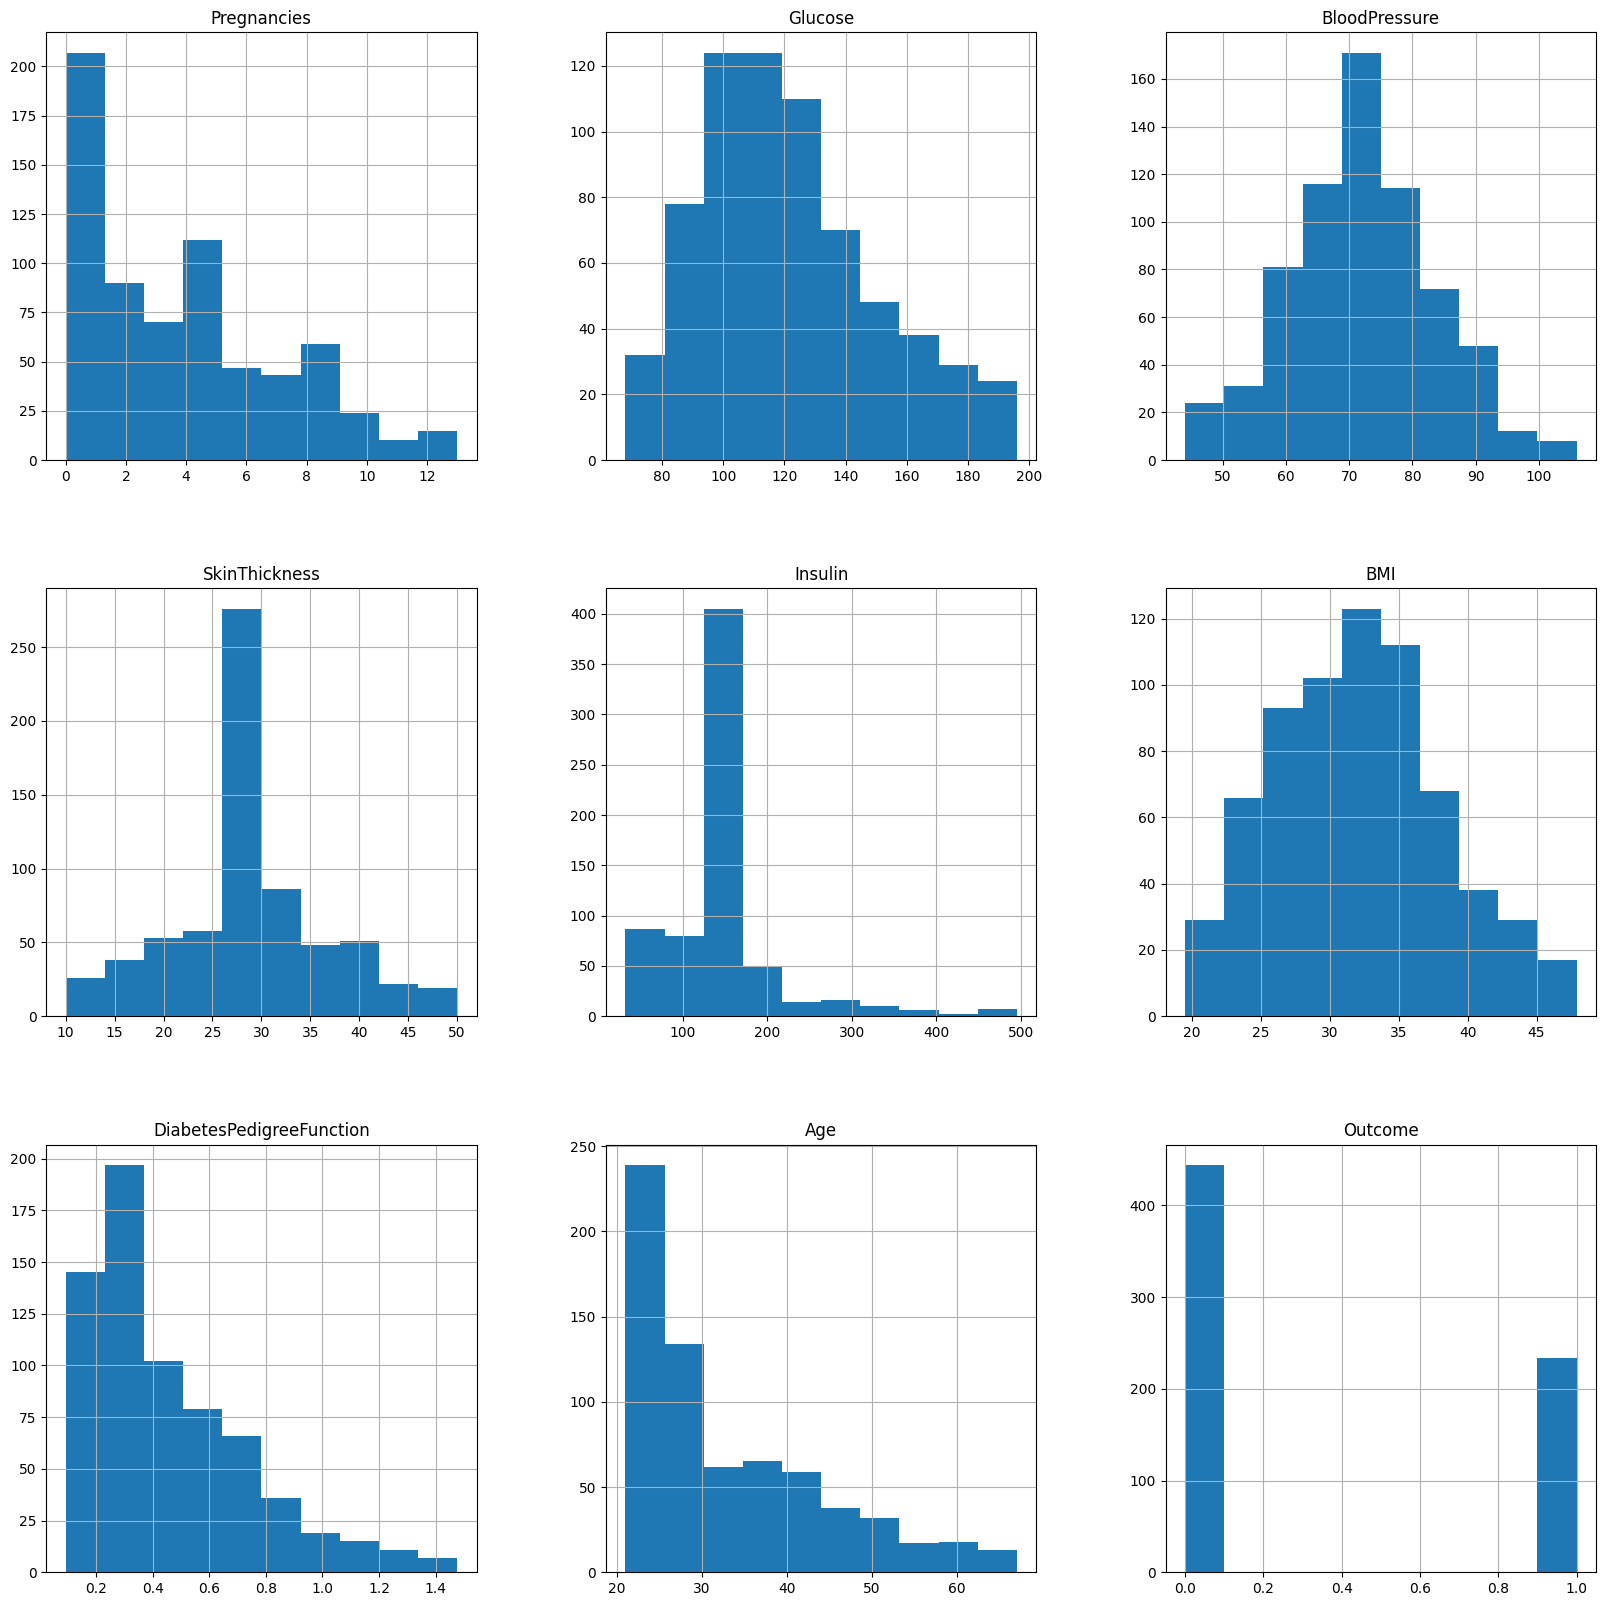

In [ ]:
p = df_new_backup.hist(figsize = (20,20))

**Handing Imbalance Datasets**

before Counter({0: 444, 1: 233})
after Counter({1: 444, 0: 444})


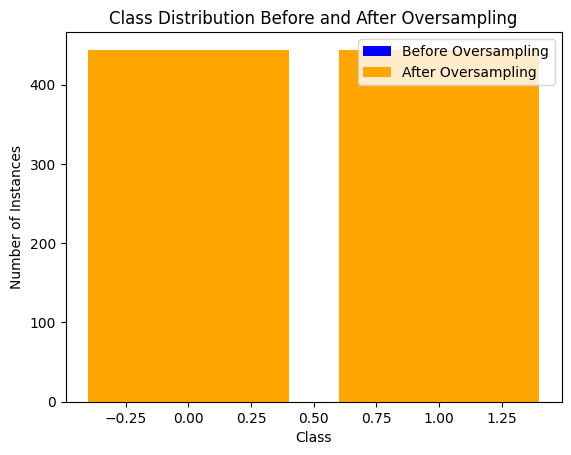

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter
import matplotlib.pyplot as plt

x = df_new_backup.drop(columns=['Outcome'])
y = df_new_backup.Outcome # contains the target variable

# The output will show the class distribution before applying SMOTE.
print('before',Counter(y))


#instance smote was created.
smote = SMOTE()
smotex, smotey = smote.fit_resample(x, y) # The fit_resample method is called to oversample the minority class using SMOTE. It returns the resampled features (smotex) and target variable (smotey).

# The output will show the class distribution after applying SMOTE.
print('after', Counter(smotey))

plt.bar(Counter(y).keys(), Counter(y).values(), color='blue', label='Before Oversampling')
plt.bar(Counter(smotey).keys(), Counter(smotey).values(), color='orange', label='After Oversampling')
plt.legend()
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution Before and After Oversampling')
plt.show()


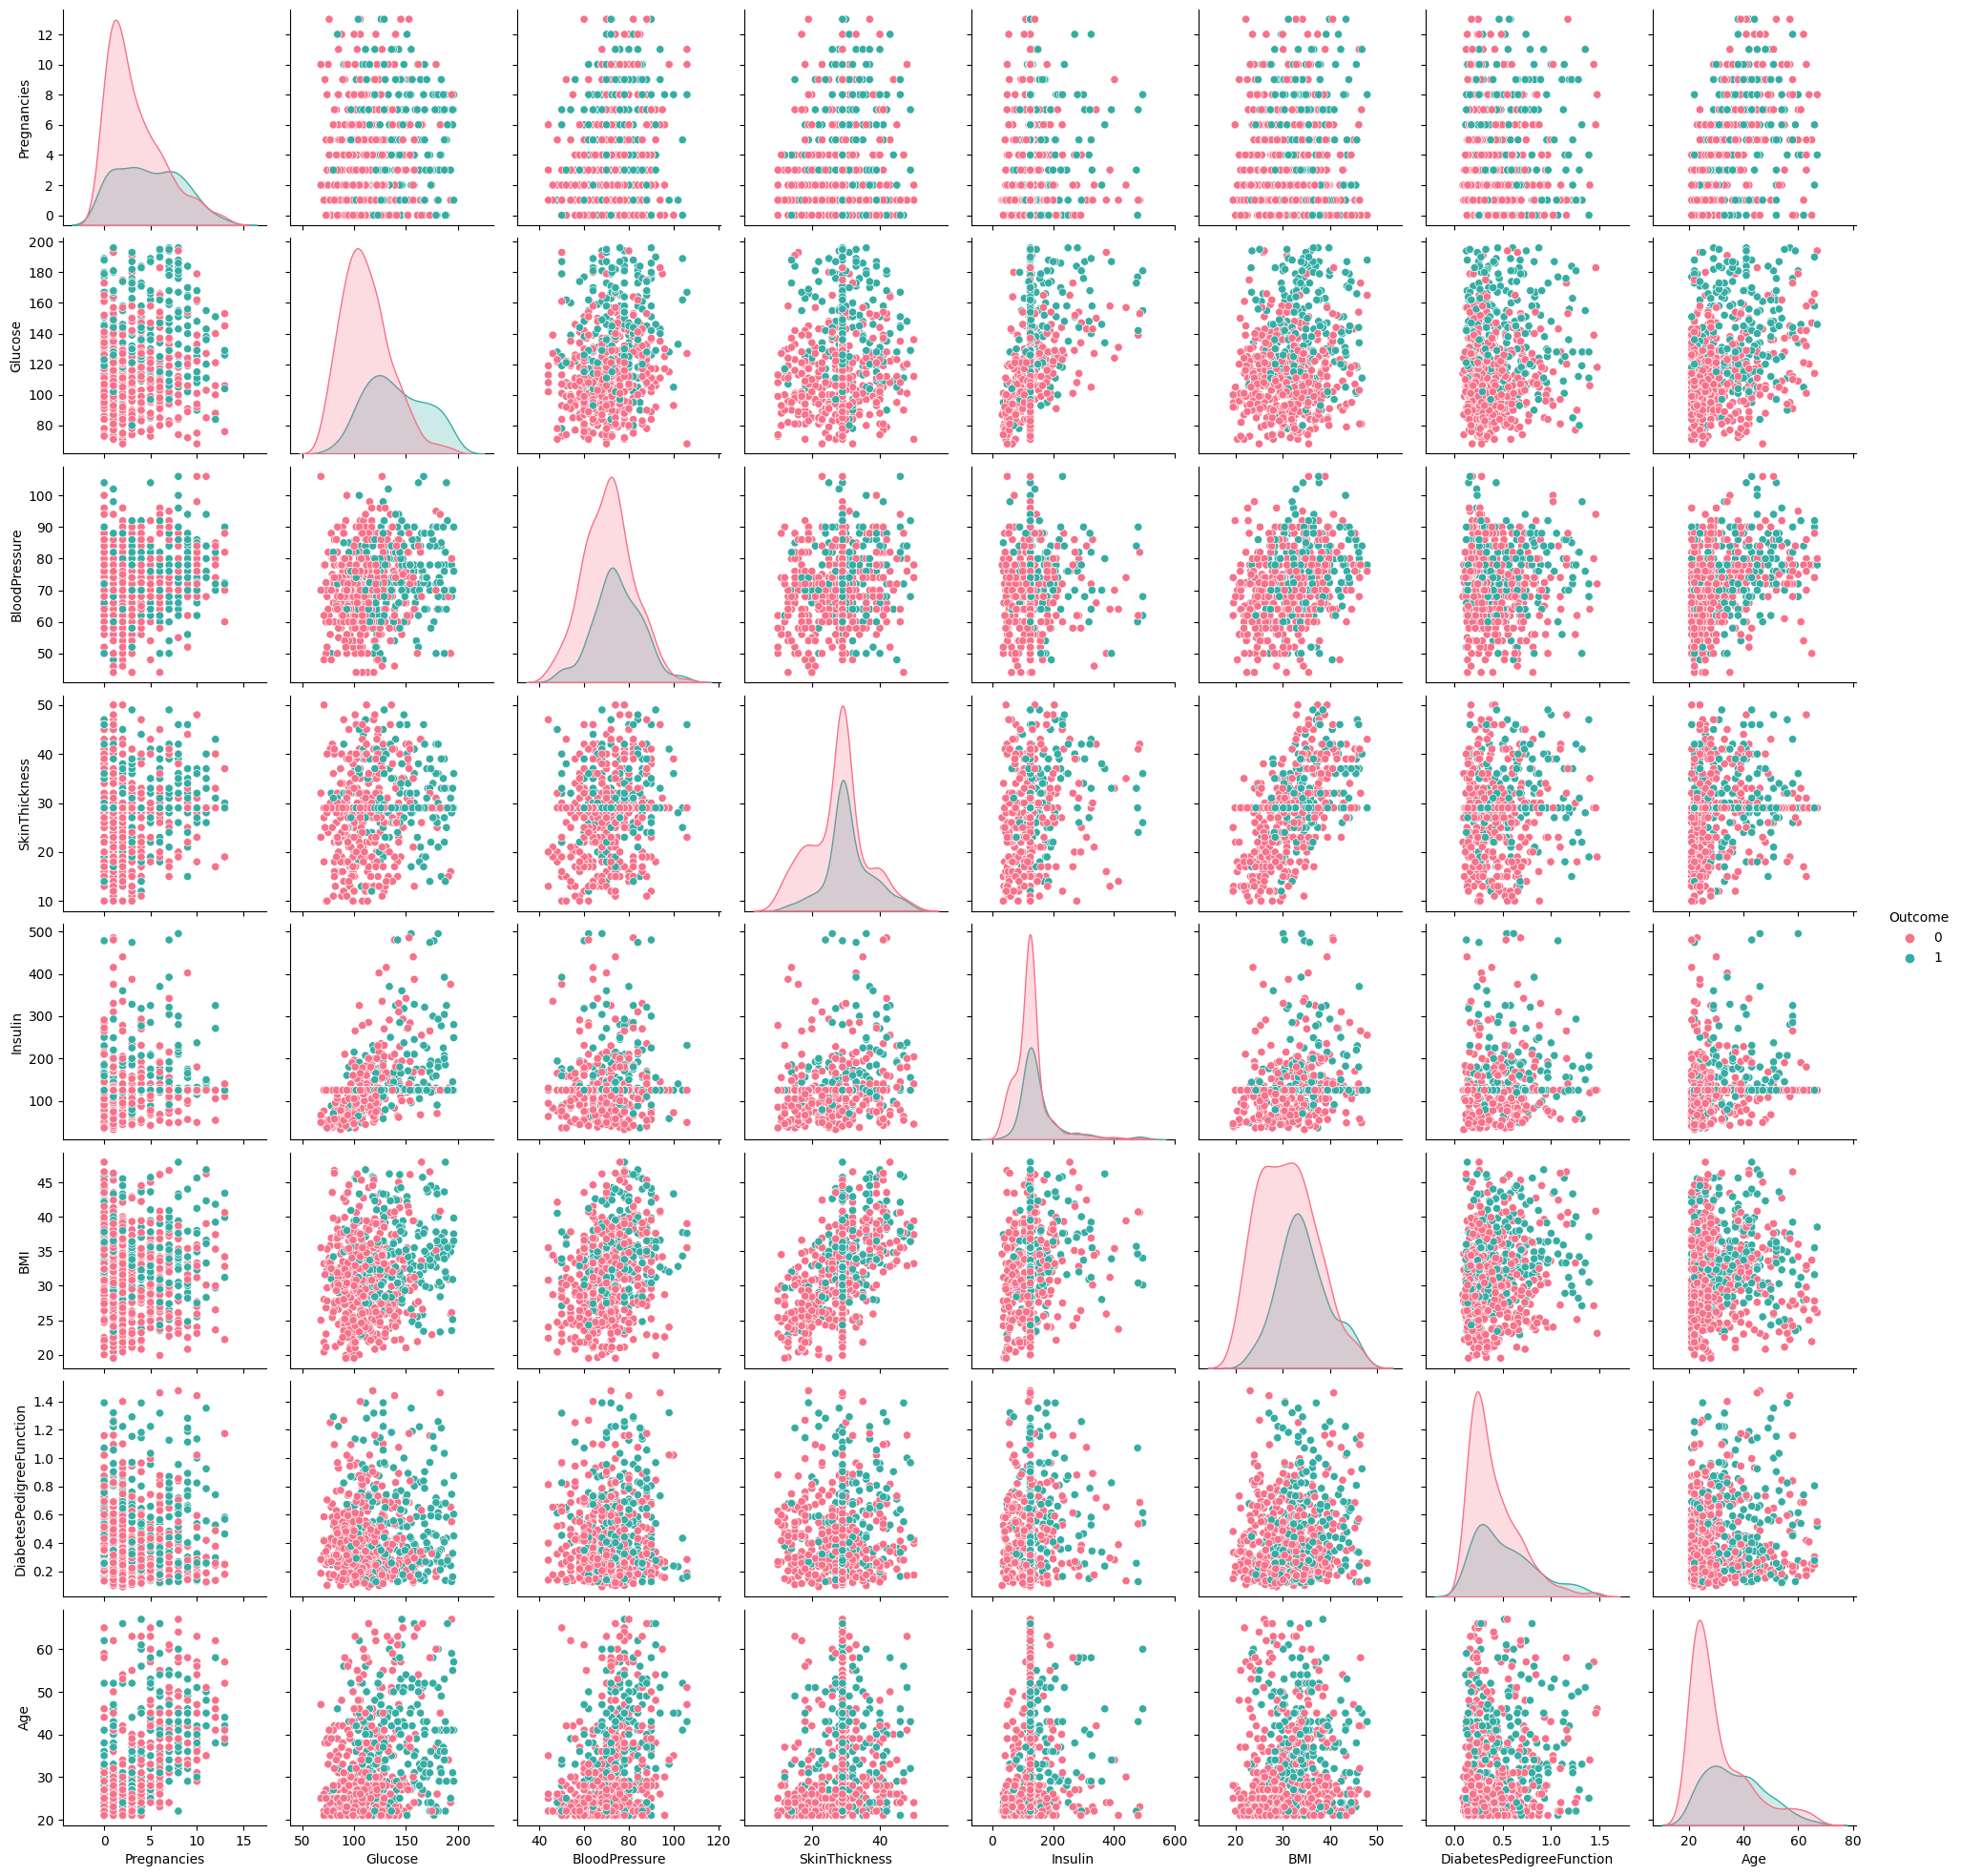

In [ ]:
 import seaborn as sns
 g = sns.pairplot(df_new_backup, hue="Outcome", palette="husl")

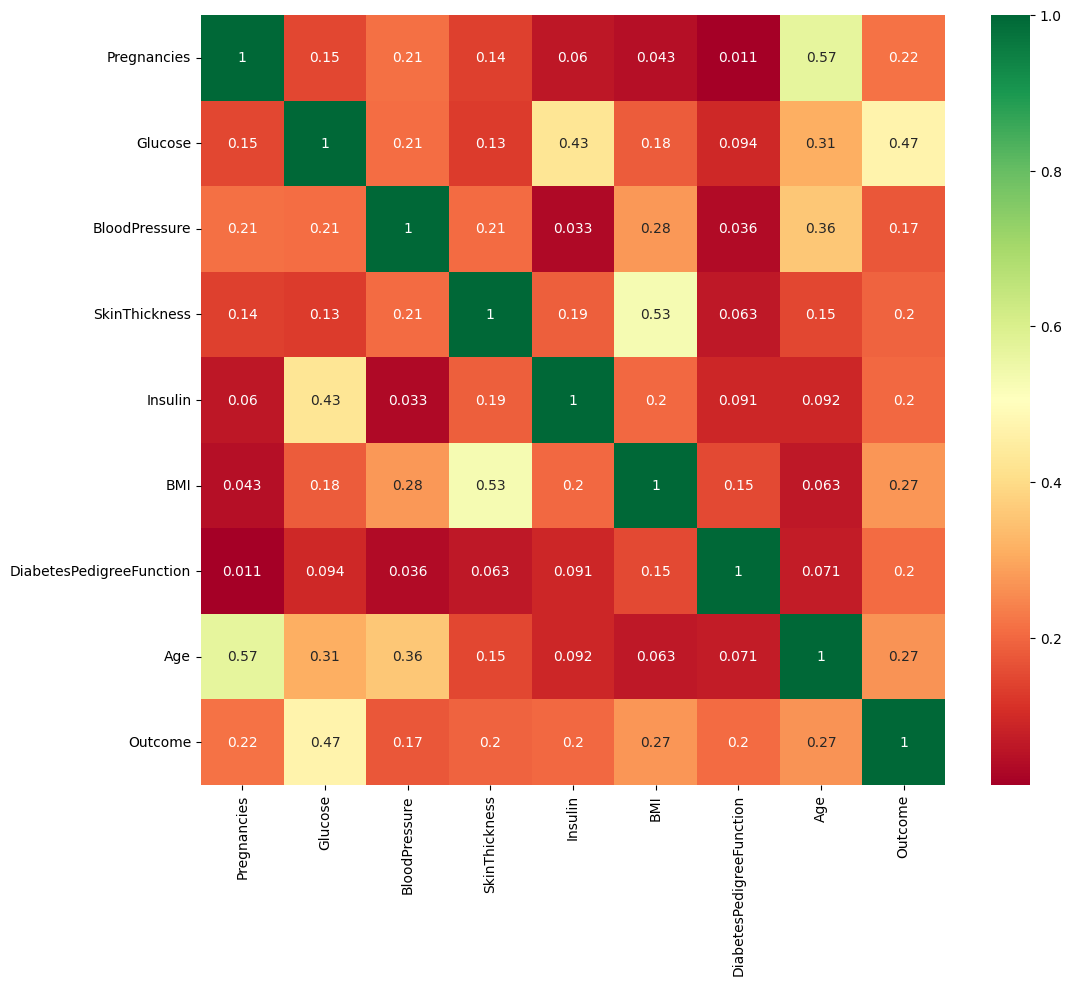

In [ ]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df_new_backup.corr(), annot=True,cmap ='RdYlGn')

In [ ]:
from sklearn.model_selection import train_test_split

# smotex: The features (independent variables) after SMOTE oversampling.
# smotey: The target variable (dependent variable) after SMOTE oversampling.
# test_size=0.2: Specifies that 20% of the data should be used for testing, and the remaining

xtrain_, xtest_, ytrain_, ytest_ = train_test_split(smotex, smotey, test_size=0.2)

In [ ]:
#IMPORT ALL THE ALGOS NEED
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import * #ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import *

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [ ]:
# This code defines a function named get_score that takes several parameters, fits multiple machine learning models to training data, and returns a DataFrame containing the scores of each model on the test data.

def get_score(names, models, _X_train, _y_train, _X_test, _y_test, index):
    res = {' ':[index]} # key and a list containing the provided index as the value.
    for n, model in enumerate(models):
      trained = model.fit(_X_train, _y_train)
      score = trained.score(_X_test, _y_test)
      res[names[n]] = score
    df = pd.DataFrame(res).set_index(' ') # Converts the res dictionary into a DataFrame using pandas (pd.DataFrame(res))
    return df

In [ ]:
def get_validators():
  NN = MLPClassifier(max_iter = 1000)
  LR = LogisticRegression(max_iter = 1000)
  SVM = SVC()
  ABC = AdaBoostClassifier()
  GBC = GradientBoostingClassifier()
  KNN = KNeighborsClassifier()
  GNB = GaussianNB()
  ET = ExtraTreesClassifier()
  RF = RandomForestClassifier()
  DT = DecisionTreeClassifier()
  XGB = XGBClassifier()

  return ([     'Neural Network',
                'Logistic Regression',
                'Support Vector Machine',
                'Ada Boost Classifier',
                'Gradient Boosting Classifier',
                'K-Nearest Neighbors',
               'Gaussian Naive Bayes',
               'Extra Trees',
               'Random Forest',
               'Decision Tree',
               'XGB Classifier'],
          [NN, LR, SVM, ABC, GBC, KNN, GNB, ET, RF, DT, XGB])

In [ ]:
names, models = get_validators()
scores = get_score(names, models, xtrain_, ytrain_, xtest_, ytest_, ' ')

scores

,Neural Network,Logistic Regression,Support Vector Machine,Ada Boost Classifier,Gradient Boosting Classifier,K-Nearest Neighbors,Gaussian Naive Bayes,Extra Trees,Random Forest,Decision Tree,XGB Classifier
,,,,,,,,,,,
,0.66,0.72,0.74,0.75,0.76,0.72,0.74,0.84,0.80,0.69,0.78


**Rescaling the Data using Standard Scaler**

In [ ]:
rescale_df = df_new_backup

In [ ]:
rescale_df.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6   148.00          72.00          35.00   125.00 33.60   
1              1    85.00          66.00          29.00   125.00 26.60   
2              8   183.00          64.00          29.00   125.00 23.30   
3              1    89.00          66.00          23.00    94.00 28.10   
5              5   116.00          74.00          29.00   125.00 25.60   
..           ...      ...            ...            ...      ...   ...   
763           10   101.00          76.00          48.00   180.00 32.90   
764            2   122.00          70.00          27.00   125.00 36.80   
765            5   121.00          72.00          23.00   112.00 26.20   
766            1   126.00          60.00          29.00   125.00 30.10   
767            1    93.00          70.00          31.00   125.00 30.40   

     DiabetesPedigreeFunction  Age  Outcome  
0                        0.63   50 

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter

x = rescale_df.drop(columns=['Outcome'])
y = rescale_df.Outcome

# define oversampling strategy
smote = SMOTE()
smotex, smotey = smote.fit_resample(x, y)

print(Counter(smotey))

Counter({1: 444, 0: 444})


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in x:
  smotex[col] = smotex[col].astype(float)
  smotex[[col]] = scaler.fit_transform(smotex[[col]])

smotex.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.61,0.74,-0.07,0.80,-0.24,0.19,0.52,1.45
1,-0.95,-1.37,-0.63,-0.02,-0.24,-1.04,-0.44,-0.27
2,1.24,1.91,-0.82,-0.02,-0.24,-1.61,0.68,-0.18
3,-0.95,-1.24,-0.63,-0.84,-0.67,-0.77,-1.09,-1.17
4,0.30,-0.33,0.12,-0.02,-0.24,-1.21,-0.97,-0.36


In [ ]:
smotex.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

Training

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split( smotex, smotey, test_size = 0.2 )

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import * #ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import *

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score

In [ ]:
def cross_validate(names, models, _X_train, _y_train, index, cv=5):
  res = []
  for model in models:
    draft = model_selection.cross_val_score(model, _X_train, _y_train, cv=cv)
    res.append(draft)
  index = [index+' CV_' + str(i) for i in range(cv)]
  accuracy = pd.DataFrame(np.array(res).T,
                          columns=names,
                          index=index,
                          ).round(decimals=3)
  return accuracy



In [ ]:
def get_validators():
  NN = MLPClassifier(max_iter = 1000)
  LR = LogisticRegression(max_iter = 1000)
  SVM = SVC()
  ABC = AdaBoostClassifier()
  GBC = GradientBoostingClassifier()
  KNN = KNeighborsClassifier()
  GNB = GaussianNB()
  ET = ExtraTreesClassifier()
  RF = RandomForestClassifier()
  DT = DecisionTreeClassifier()
  XGB = XGBClassifier()

  return ([     'Neural Network',
                'Logistic Regression',
                'Support Vector Machine',
                'Ada Boost Classifier',
                'Gradient Boosting Classifier',
                'K-Nearest Neighbors',
               'Gaussian Naive Bayes',
               'Extra Trees',
               'Random Forest',
               'Decision Tree',
               'XGB Classifier'],
          [NN, LR, SVM, ABC, GBC, KNN, GNB, ET, RF, DT, XGB])

In [ ]:
model_names, models = get_validators()
accuracy = cross_validate(model_names, models, xtrain, ytrain, 'Diabetes')
accuracy

,Neural Network,Logistic Regression,Support Vector Machine,Ada Boost Classifier,Gradient Boosting Classifier,K-Nearest Neighbors,Gaussian Naive Bayes,Extra Trees,Random Forest,Decision Tree,XGB Classifier
Diabetes CV_0,0.85,0.72,0.82,0.75,0.82,0.77,0.72,0.82,0.81,0.77,0.79
Diabetes CV_1,0.78,0.70,0.78,0.76,0.78,0.78,0.72,0.80,0.78,0.73,0.80
Diabetes CV_2,0.75,0.75,0.80,0.76,0.78,0.75,0.77,0.80,0.80,0.72,0.80
Diabetes CV_3,0.75,0.71,0.76,0.80,0.76,0.78,0.73,0.78,0.79,0.70,0.81
Diabetes CV_4,0.77,0.68,0.80,0.80,0.80,0.73,0.70,0.82,0.80,0.71,0.77
